In [1]:
import sys
sys.path += ['layers']
import numpy as np
from init_model import init_model
from data_utils import get_CIFAR10_data
import pickle
import matplotlib.pyplot as plt

from init_base_model import init_base_model
from train_custom import train_custom

%load_ext autoreload
%autoreload 2

### Load Data & Partition

In [2]:
X_train, y_train, X_test, y_test = get_CIFAR10_data()

### TRAIN DATA TINY
n_train = 100
X_train_tiny = X_train[:,:,:, :n_train]
y_train_tiny = y_train[:n_train]

### TEST/VALIDATION DATA TINY
n_test = 1000
X_test_tiny = X_test[:,:,:,:n_test]
y_test_tiny = y_test[:n_test]

Train data shape:  (32, 32, 3, 50000)
Train labels shape:  (50000,)
Test data shape:  (32, 32, 3, 10000)
Test labels shape:  (10000,)


### Set Parameters

This is for one run of the model- could create a set of list param files to loop over and pass into a new model.

In [6]:
# SET PARAMS HERE
learning_rate = 1e-2 # already did 1e3, 1e4
weight_decay = 1e-5 # lready did 1e-6
batch_size = 64 # already did 32
live_plot_on = False
itr_to_plot = 50
verbose = True
early_stopping_on = True
calculate_test = True
itr_to_test = 100
numIters = 15000 # already did 10k
save_file = f"\\test_full_base_model_6"

# other params
# save_plot - if you want to save performance plot out (True)
# save path - where to put train model and plot (\results foler)

# PACK INTO PARAMS DICT
params = {
    "learning_rate" :learning_rate, # default 0.01
    "weight_decay":weight_decay ,   # default 0.0005
    "batch_size" : batch_size,      # default 128
    "save_file" : save_file,        # default model
    "live_plot_on" : live_plot_on,
    "itr_to_plot" : itr_to_plot,    # how many iterations until live plot refresh
    "verbose" : verbose,
    "early_stopping_on" : early_stopping_on, # defualt True
    "calculate_test": calculate_test,        # bool for validation checks, default true
    "itr_to_test": itr_to_test,              # n iterations between validation check
    "X_test" : X_test_tiny,                  # validation set, can be empty
    "y_test" : y_test_tiny,                  # validation set, can be empty
    }

### Run Model

In [7]:
model = init_base_model()

Input size:
[32, 32, 3]
Layer 0 output size: 
(28, 28, 3)
Layer 1 output size: 
(14, 14, 3)
Layer 2 output size: 
(14, 14, 3)
Layer 3 output size: 
(588,)
Layer 4 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


*****Starting training! bs: 64, lr: 0.01 wd: 1e-05, n_images: 50000, n_test: 1000*****
Fished itr 0 / 15000; cost: 3.22962 train: 0.125 val: 0.1
Fished itr 1 / 15000; cost: 2.70911 train: 0.09375 val: 0.1
Fished itr 2 / 15000; cost: 3.09244 train: 0.171875 val: 0.1
Fished itr 3 / 15000; cost: 2.6659 train: 0.1875 val: 0.1
Fished itr 4 / 15000; cost: 2.48378 train: 0.09375 val: 0.1
Fished itr 5 / 15000; cost: 2.56669 train: 0.203125 val: 0.1
Fished itr 6 / 15000; cost: 2.74306 train: 0.09375 val: 0.1
Fished itr 7 / 15000; cost: 2.47435 train: 0.109375 val: 0.1
Fished itr 8 / 15000; cost: 2.4837 train: 0.125 val: 0.1
Fished itr 9 / 15000; cost: 2.50394 train: 0.109375 val: 0.1
Fished itr 10 / 15000; cost: 2.45669 train: 0.078125 val: 0.1
Fished itr 11 / 15000; cost: 2.64005 train: 0.0625 val: 0.1
Fished itr 12 / 15000; cost: 2.49329 train: 0.09375 val: 0.1
Fished itr 13 / 15000; cost: 2.44344 train: 0.15625 val: 0.1
Fished itr 14 / 15000; cost: 2.53032 train: 0.09375 val: 0.1
Fished itr 

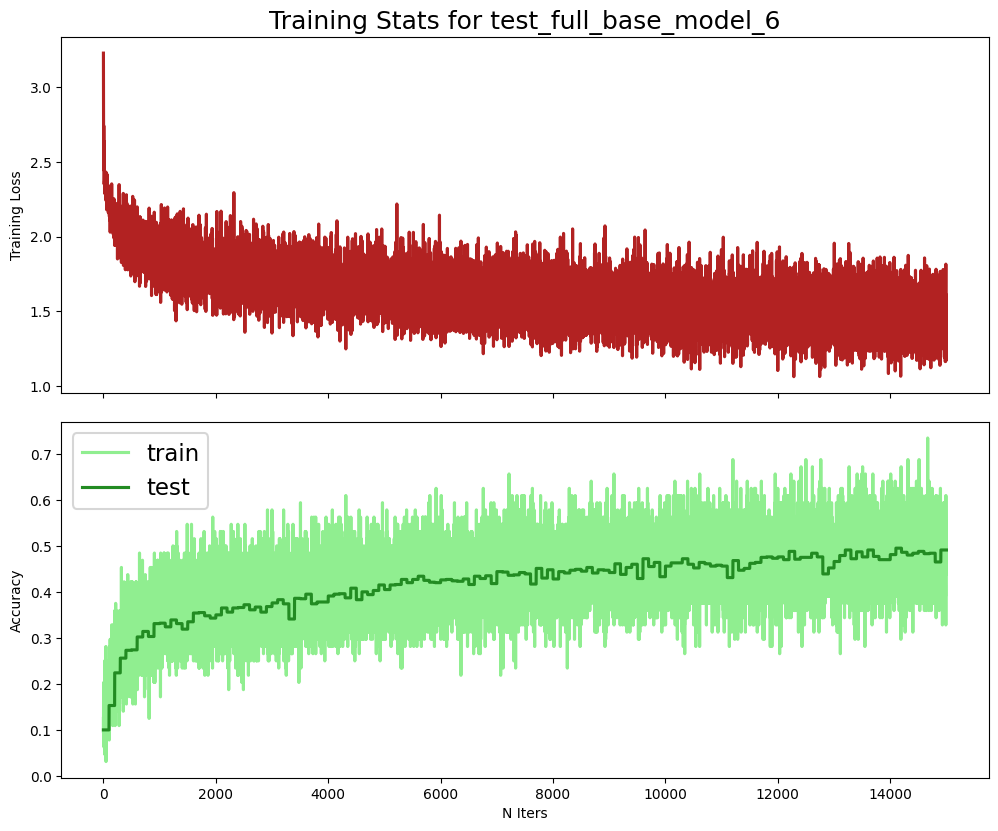

In [8]:
trained_model, loss, accuracy, test_accuracy, time = train_custom(
    model,
    X_train, 
    y_train, 
    params, 
    numIters
    )

## EVAL

In [9]:
# from utils import make_model_fit_df
# make_model_fit_df(params, loss, accuracy, test_accuracy)
from utils import save_out_model_info
from utils import SAVE_PATH
from utils import test

import pandas as pd

try:
    loss
except:
    import pandas as pd
    time = 10293.89
    save_file = params["save_file"]
    model_fit_info_df = pd.read_csv(SAVE_PATH + save_file + '_fit_data.csv')
    loss = model_fit_info_df["loss"]
    accuracy = model_fit_info_df["train_acc"]
    test_accuracy = model_fit_info_df["val_acc"]
    
    trained_model = np.load(SAVE_PATH + save_file + '.npz', allow_pickle=True)
    trained_model = dict(model)

In [10]:
eval_accuracy = test(trained_model, X_test, y_test)

running test on 10000 images
accuracy is 0.4849


In [11]:
fit_df, summary_df = save_out_model_info(
    params, 
    loss,
    train_accuracy = accuracy,
    val_accuracy = test_accuracy,
    time=time, 
    save_and_return=True,
    eval_accuracy = eval_accuracy)

\test_full_base_model_6 model fit df saved
\base_model_summary updated


In [12]:
summary_df

,learning_rate,weight_decay,batch_size,save_file,numIters,time,eval_acc,loss_min,loss_mean,loss_max,train_acc_min,train_acc_mean,train_acc_max,val_acc_min,val_acc_mean,val_acc_max
0,0.0001,0.000001,32,\test_full_base_model_2,20000,115.03,0.1870,1.971422,2.293191,2.293191,0.00000,0.147850,0.147850,0.086,0.124160,0.124160
1,0.0100,0.000001,32,\test_full_base_model_3,15000,115.03,0.4498,0.911628,1.638785,1.638785,0.00000,0.409908,0.409908,0.109,0.395007,0.395007
2,0.0010,0.000001,32,\test_full_base_model_4,15000,90.62,0.3580,1.352808,2.020541,2.020541,0.00000,0.266600,0.266600,0.073,0.261507,0.261507
3,0.0100,0.000001,64,\test_full_base_model_5,15000,173.16,0.4466,1.150103,1.645804,1.645804,0.03125,0.412840,0.412840,0.104,0.402973,0.402973
4,0.0100,0.000010,64,\test_full_base_model_6,15000,171.56,0.4849,1.061306,1.617364,1.617364,0.03125,0.428539,0.428539,0.100,0.417433,0.417433


In [13]:
fit_df.describe()

,loss,train_acc,val_acc
count,15000.000000,15000.000000,15000.000000
mean,1.617364,0.428539,0.417433
std,0.200005,0.084470,0.064133
min,1.061306,0.031250,0.100000
25%,1.477914,0.375000,0.383000
50%,1.597721,0.437500,0.434500
75%,1.734339,0.484375,0.463000
max,3.229618,0.734375,0.495000
